#**Geocoding Existing Mobile Home Parks (MHP) in Los Angeles County**

This notebook goes through the process of geocoding the mobile home park dataset from LA County. Since our data only included addresses, we will need to convert the addresses to geographic coordinates.

**Import Libraries**

In [1]:
import osmnx as ox
import geopandas as gpd
import contextily as ctx
import plotly.express as px
import pandas as pd

In [2]:
mhp = pd.read_csv( 'Data/MHP_notgeocoded.csv')

**Data Exploration**

In [3]:
mhp.head()

,Unnamed: 0,Park Name,County,Park Identifier,Park Address,City,Zip,Phone,Fire Authority,Jurisdiction,MH Spaces,RV Lots W/Drains,RV Lots W/O Drains,Operated by,lat,lon
0,0,IMPERIAL TRAILER PARK,LOS ANGELES,13-0018-MP,"600 N IMPERIAL AVE, HAWTHORNE, CA 90250",HAWTHORNE,90250,NaN,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","IMPERIAL COUNTY BUILDING DEPARTMENT, 801 MAIN ...",8,0,0,"HOLCOM, BRADLEY, PO BOX 3162, SAN DIEGO, CA 92163",NaN,NaN
1,2,A & A MOBILE HOME PARK,LOS ANGELES,19-0003-MP,"7722 ATLANTIC BLVD, CUDAHY, CA 90201",CUDAHY,90201,(310) 676-0663,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",21,0,0,"A & A MHP LLC, 26895 ALISO CREEK RD #B876, ALI...",NaN,NaN
2,5,CACTUS CREEK,LOS ANGELES,19-0010-MP,"3740 SMITH ST, ACTON, CA 93510",ACTON,93510,(661) 618-1155,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",10,0,0,"PROPERTY REPAIR SERVICES, 915 WILSHIRE BLVD, #...",NaN,NaN
3,6,SANTI TP,LOS ANGELES,19-0012-MP,"2730 N CHICO AVE, S EL MONTE, CA 91733",S EL MONTE,91733,(626) 222-2290,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",17,0,0,"SANTI, NORMA, 8241 E GRAVES AVE, ROSEMEAD, CA ...",NaN,NaN
4,7,IMPERIAL TRAILER VILLAGE,LOS ANGELES,19-0019-MP,"3905 W IMPERIAL HWY, INGLEWOOD, CA 90303",INGLEWOOD,90303,(310) 674-1419,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",17,0,0,"RARICA, LLC, PO BOX 1753, PACIFIC PALISADES, C...",NaN,NaN


**Trim the Data**

In [ ]:
mhp.info()

*Because the dataset doesn't have accessive columns, I will keep them in case I want to explore with them later for another analysis*

**Add the lat/lon columns**

This command will allow me to add empty lat/lon columns to our dataframe as placeholders for the geocoding.

In [ ]:
mhp['lat'] = pd.Series(dtype='float')
mhp['lon'] = pd.Series(dtype='float')

In [ ]:
mhp.head()

**Loop & geocode**

Now that I have added the columns, I can begin geocoding. First I will loop through list and add to dataframe with lat/lon's

In [4]:
mhp['Park Address']

0            600 N IMPERIAL AVE,  HAWTHORNE,  CA 90250
1               7722 ATLANTIC BLVD,  CUDAHY,  CA 90201
2                     3740 SMITH ST,  ACTON,  CA 93510
3             2730 N CHICO AVE,  S EL MONTE,  CA 91733
4           3905 W IMPERIAL HWY,  INGLEWOOD,  CA 90303
                            ...                       
217    42505 RANCH CLUB RD,  LAKE ELIZABETH,  CA 93532
218               13691 GAVINA AVE,  SYLMAR,  CA 91342
219           1030 EAST AVENUE S,  PALMDALE,  CA 93550
220                 1535 SIERRA HWY,  ACTON,  CA 93510
221           17100 S GRAMERCY PL,  GARDENA,  CA 90247
Name: Park Address, Length: 222, dtype: object

In [6]:
locations = gpd.tools.geocode(mhp['Park Address'], provider='photon')

<AxesSubplot:>

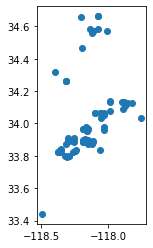

In [8]:
locations.plot()

In [15]:

 gpd.tools.geocode('Los Angeles', provider='photon')

,geometry,address
0,POINT (-118.24277 34.05369),"Los Angeles, California, United States"


In [11]:
for index, row in mhp.iterrows():

    # identify the address column
    address = row['Park Address']
    
    try:
        
        # geocode it
#         geocoded_address = ox.geocoder.geocode(address)
        gpd.tools.geocode(address, provider='photon')
        
        # add it to the dataframe
        mhp.at[index,'lat']=geocoded_address[0]
        mhp.at[index,'lon']=geocoded_address[1]

        # print the output
        print(address + ' geocoded to ' + str(geocoded_address[0])+' '+str(geocoded_address[1]))        

    except:
        print('Could not geocode '+ address)
        pass

Could not geocode 600 N IMPERIAL AVE,  HAWTHORNE,  CA 90250
Could not geocode 7722 ATLANTIC BLVD,  CUDAHY,  CA 90201
Could not geocode 3740 SMITH ST,  ACTON,  CA 93510
Could not geocode 2730 N CHICO AVE,  S EL MONTE,  CA 91733
Could not geocode 3905 W IMPERIAL HWY,  INGLEWOOD,  CA 90303
Could not geocode 15012 LEMOLI AVE,  GARDENA,  CA 90249
Could not geocode 1422 E ROSECRANS,  COMPTON,  CA 90220
Could not geocode 43667 TR. K ELIZABETH LAKE,  LAKE HUGHES,  CA 93532
Could not geocode 8807 E PALMDALE BLVD,  PALMDALE,  CA 93550
Could not geocode 9023 E ROSE ST,  BELLFLOWER,  CA 90706
Could not geocode 10026 E KLENGERMAN AVE,  S EL MONTE,  CA 91733
Could not geocode 7221 E SOMERSET AVE #0223,  PARAMOUNT,  CA 90723
Could not geocode 13713 S VERMONT,  GARDENA,  CA 90247
Could not geocode 24210 E EAST FORK RD,  AZUSA,  CA 91702
Could not geocode 8614 E FLOWER,  PARAMOUNT,  CA 90723
Could not geocode 2449 LOMA AVE #0053,  S EL MONTE,  CA 91733
Could not geocode 15021 S WADSWORTH,  COMPTON,  CA

In [ ]:
mhp

I can see **most** of the addresses were successfully geocoded

In [ ]:
geocoded = mhp[mhp.lat.notnull()]

In [ ]:
geocoded

**Convert to geodataframe**

The resulting table is a pandas dataframe. I'll convert it to a geodataframe. Since the addresses were geocoded to their latitude and longitude coordinates, I'll specify here to use the WGS84 geographic coordinate system using EPSG: 4326

In [ ]:
# convert pandas dataframe to geodataframe
geomhp = gpd.GeoDataFrame(geocoded, 
                                     crs="EPSG:4326",
                                     geometry=gpd.points_from_xy(geocoded.lon, geocoded.lat))

In [ ]:
geomhp

**Add base layer capability**

Next, I'll project it to a web mercator projection to allow contextily titles to work as a base layer

In [ ]:
# reproject to web mercator
crsmhp = geomhp.to_crs(epsg=3857)

In [ ]:
crsmhp

**Map Time!** :smile:

In [ ]:
ax = crsmhp.plot(figsize=(12,20),
                              column='City',
                              legend=True,
                              cmap='Set1',
                             markersize=60)

ax.axis('off')
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

Now, my map doesn't look as clear as I'd like. It's helpful to know every city but there are areas of concentration, and the overlaps take away from the map. Geocoding was helpful because it gave me a visual of our data, and that in turn will help me think about next steps. I also have to consider that the command didn't geocode all the addresses- so i'll have to export this dataframe to csv and geocode the remaining addresses. 

For the map, I will explore mapping them based on numbers of mobile homes and RVs.

In [ ]:
crsmhp

**Filtering Data**

I know that my data has 596 samples, but I want to know more about how many units exists in each park. 

In [ ]:
mhp.info()

In [ ]:
new = mhp[mhp.geometry.isnull()]

In [ ]:
new.head()

In [ ]:
notgeocoded = mhp[mhp.lat.isnull()]

In [ ]:
notgeocoded

In [ ]:
notgeocoded.to_csv("MHP_notgeocoded.csv")

In [ ]:
geomhp.to_file("MHP_geocoded.csv")

In [ ]:
geomhp.to_file("MHP_geocoded.geojson", driver='GeoJSON')